In [1]:
# importing important packhge
import pandas as pd
import numpy as np

In [3]:
# Importing data
data = pd.read_csv('data.csv')

In [5]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# Data Preperation

In [9]:
# replacing the space by the _ in the columns.
data.columns = data.columns.str.lower().str.replace(' ','_')

In [11]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [13]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [15]:
# make list of columns with dtypes == object
strings = list(data.dtypes[data.dtypes == 'object'].index)

In [17]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [19]:
# Apply the for loop to convert all the columns into lower case as well as replace space by _.
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [21]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# EDA

In [24]:
# Import package
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

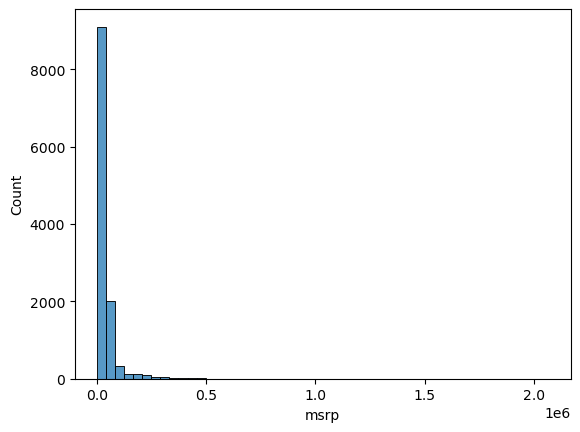

In [25]:
# ploting histogram of the msrp to see the distribution of data.
sns.histplot(data['msrp'], bins= 50)
plt.show()

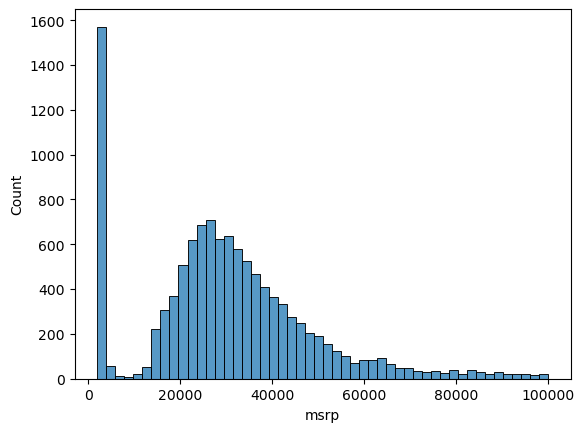

In [28]:
# the is left skewed . So we considering the data less than 100000.
sns.histplot(data.msrp[data.msrp < 100000], bins= 50)
plt.show()

In [30]:
# number is too large to consider so we taking logorithm.
price_logs = np.log1p(data.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

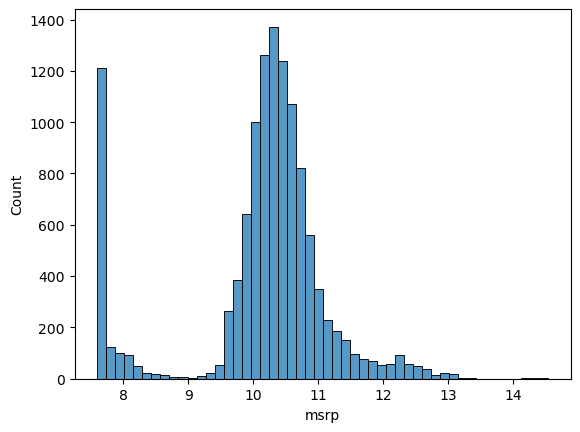

In [32]:
# Now the data seems to look more normally distributed.
sns.histplot(price_logs, bins= 50)
plt.show()

In [34]:
# Finding Missing values
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

 # Setting up the validation FrameWork

In [37]:
len(data) 

11914

In [39]:
# Distributing the data in different percentage manually without use of pre-build fuction.
n = len(data)
n_val =  int(n*0.2)
n_test = int(n*0.2)
n_train = int(n - n_val - n_test)

In [41]:
(n_train+ n_val + n_test), n

(11914, 11914)

In [43]:
# distributing train, test and validation datasets.
data_val = data.iloc[ : int(n_val)]
data_test = data.iloc[ int(n_val) : int(n_val + n_test)]
data_train = data.iloc[int(n_val + n_test) : ]

In [45]:
data_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [47]:
# Create an array with indices 1 to n -1.
idx = np.arange(n)

In [49]:
# use nuumpy.seed() to run everytime the same data and suffule the data.
np.random.seed(2)
np.random.shuffle(idx)

In [51]:
# Disributing the suffles data into validation, test and training datasets.
data_val = data.iloc[ : int(n_val)]
data_test = data.iloc[ int(n_val) : int(n_val + n_test)]
data_train = data.iloc[int(n_val + n_test) : ]

In [53]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [55]:
# Droppping the old indixes which are saved as column.
data_val = data_val.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)
data_train = data_train.reset_index(drop =True)

In [57]:
# taking the logorithm of target variable of validation, test and training dataset.
y_train = np.log1p(data_train.msrp.values)
y_val = np.log1p(data_val.msrp.values)
y_test = np.log1p(data_test.msrp.values)

In [59]:
# Deleting the target varibale column from the training, test and validation dataset.
del data_train['msrp']
del data_val['msrp']
del data_test['msrp']

In [61]:
data_train.iloc[10]

make                                        bentley
model                                   flying_spur
year                                           2016
engine_fuel_type        premium_unleaded_(required)
engine_hp                                     500.0
engine_cylinders                                8.0
transmission_type                         automatic
driven_wheels                       all_wheel_drive
number_of_doors                                 4.0
market_category      exotic,luxury,high-performance
vehicle_size                                  large
vehicle_style                                 sedan
highway_mpg                                      24
city_mpg                                         14
popularity                                      520
Name: 10, dtype: object

# Linear Regression

In [64]:
# Define the function of linear regression using normal equation.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Create a array of length of row of matrix X.
    X = np.column_stack([ones, X]) # Adding the ones colums at first place at the right side within the matrix X.

    XTX = X.T.dot(X)  # Taking dot product of transpose of matrix X with matrix X
    XTX_inv = np.linalg.inv(XTX) # Inverse of matix after dot product.
    w = XTX_inv.dot(X.T).dot(y) # Applying the normal equation to matrix.
    
    return w[0], w[1:] # seperating the bias term and weight factors.

# Base line model

In [67]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [69]:
# Select fields wicch are used to train the model.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [71]:
# convert into matrix.
X_train = data_train[base].values
X_train

array([[ 287.,    6.,   23.,   16., 5657.],
       [ 365.,    6.,   21.,   15., 5657.],
       [ 287.,    6.,   22.,   16., 5657.],
       ...,
       [ 300.,    6.,   23.,   16.,  204.],
       [ 300.,    6.,   23.,   16.,  204.],
       [ 221.,    6.,   26.,   17.,   61.]])

In [73]:
y_train

array([10.54009084, 10.66967607, 10.60114953, ..., 10.83212179,
       10.83803069, 10.27491317])

In [75]:
# calculate the null values.
data_train[base].isnull().sum()

engine_hp           56
engine_cylinders    24
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [77]:
# filling null value with zero.
data_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [79]:
# fill the null value with zeroes in X train.
X_train = data_train[base].fillna(0).values

In [81]:
w0, w = train_linear_regression(X_train, y_train)

In [83]:
y_pred = w0 + X_train.dot(w)

In [85]:
y_pred

array([10.29578355, 10.92129839, 10.24584497, ..., 10.47719754,
       10.47719754,  9.89414506])

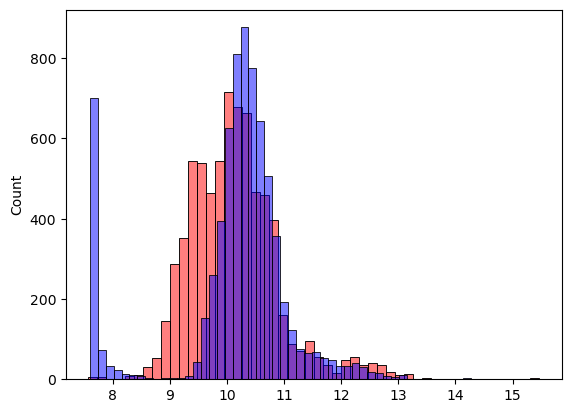

In [87]:
# plotting the graph of prediction and actual values.
sns.histplot( y_pred, color= 'red', alpha = 0.5, bins= 50)
sns.histplot( y_train, color = 'blue', alpha =0.5, bins= 50)
plt.show()

In [89]:
#### RMSE(Root Mean Squared Erore)

In [91]:
# defining function for the RMSE.
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)
    

In [93]:
rmse( y_train, y_pred)

0.7063387650493995

In [95]:
# Validation the model
def prepare_dataset(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return(X)
    
    

In [97]:
# Same as same 
X_train = prepare_dataset(data_train)
w0, w = train_linear_regression(X_train, y_train)

In [99]:
X_val = prepare_dataset(data_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val,y_pred_val)

0.8602674179621793

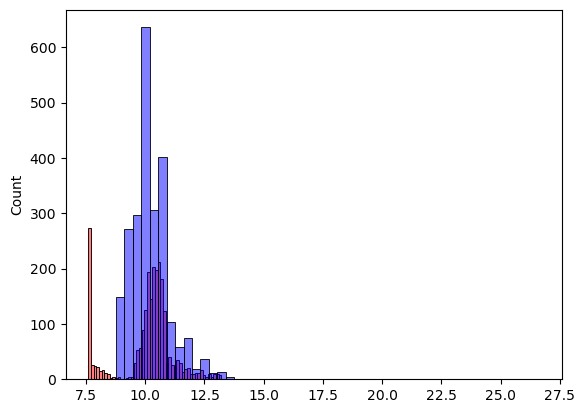

In [101]:
sns.histplot(y_val, color = 'red',alpha = 0.5, bins=50)
sns.histplot(y_pred_val, color ='blue',alpha= 0.5, bins= 50)
plt.show()

# Simple feature Engineering

In [104]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [106]:
data_train.year.max()

2017

In [108]:
2017 - data_train.year

0        1
1        0
2        0
3        0
4        0
        ..
7145     5
7146     5
7147     5
7148     4
7149    11
Name: year, Length: 7150, dtype: int64

In [110]:
# prepare data for feature engineering
def prepare_X(data):
    data = data.copy()
    data['age'] = 2017 - data.year
    feature = base + ['age']
    df_num = data[feature]
    df_num = df_num.fillna(0)
    X = df_num.values
    return(X)

In [112]:
X_train = prepare_X(data_train)


In [114]:
data_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [116]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [118]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val,y_pred_val)

0.5464063451776103

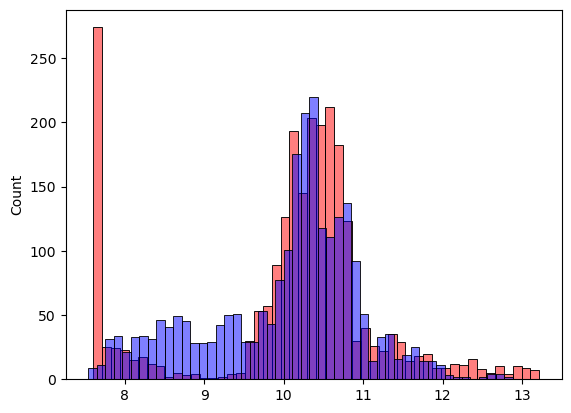

In [120]:
sns.histplot(y_val, color = 'red',alpha = 0.5, bins=50)
sns.histplot(y_pred_val, color ='blue',alpha= 0.5, bins= 50)
plt.show()

# Categorical Variable

In [123]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.4975199775858902
validation 0.5464063451776103


In [125]:
def prepare_X(data):
    data = data.copy()
    features = base.copy()

    data['age'] = 2017 - data.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        data[feature] = (data['make'] == v).astype(int)
        features.append(feature)

    df_num = data[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [127]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(data_val)
y_pred_val = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred_val))

train: 0.4825437330929576
validation: 0.5749059617368845


In [129]:
def prepare_X(data):
    df = data.copy()
    features = base.copy()

    data['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        data[feature] = (data['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        data[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        data[feature] = (data['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = data[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [131]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(data_val)
y_pred_val = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred_val))

train 0.45681061991563465
validation 0.5449327719657094


In [133]:
w0, w

(9.255874140025202,
 array([ 2.01873285e-03,  1.01449700e-01, -2.35203733e-02,  2.12360557e-02,
        -7.95420249e-05, -9.60006496e-02, -1.46862642e+00, -1.58818903e+00,
        -1.42164938e+00,  3.26761685e-02,  3.73873703e-01,  4.82191416e-02,
        -2.14467188e-01, -1.64666144e-01, -5.60577176e-01, -5.45826737e-02,
        -4.61001963e-01, -6.40829697e-01]))

# Regularization

In [136]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [138]:
y =[1,2,3,1,2,3]

In [140]:
XTX =X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [142]:
XTX = [[1,2,2],
      [2,1,1.0000001],
      [2,1.0000001,1]
      ]
XTX = np.array(XTX)
XTX

array([[1.       , 2.       , 2.       ],
       [2.       , 1.       , 1.0000001],
       [2.       , 1.0000001, 1.       ]])

In [144]:
XTX = XTX +  0.01*np.eye(3)

In [146]:
XTX_inv = np.linalg.inv(XTX)

In [148]:
XTX_inv

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [150]:
XTX_inv.dot(X.T).dot(y)

array([11.96669888, 10.97840703, 10.97841003])

In [152]:
# defined the bias and weight factor after regularization
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [154]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(data_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val,y_pred_val)

0.5446893382544966

# Tuning the model

In [157]:
# checking the bias, and score of the model at different level of r.
for r in [0.0, 0.01, 0.001, 0.0001, 0.0000001, 1, 10.0]:
    X_train = prepare_X(data_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(data_val)
    y_pred_val = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred_val)

    print(r, w0, score)

0.0 11.878079627829674 0.5449327719657094
0.01 11.837655765325199 0.5446893382544966
0.001 11.874006069728159 0.544908228781288
0.0001 11.877671957555904 0.5449303156291713
1e-07 11.878079220122515 0.5449327695083839
1 9.652109991681224 0.531767799619324
10.0 6.726083977408812 0.542461713435062


In [159]:
r =1
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r)

X_val = prepare_X(data_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val,y_pred_val)


0.531767799619324

# Using the model

In [164]:
df_full_train = pd.concat([data_train, data_val])

In [166]:
df_full_train = df_full_train.reset_index( drop =True)

In [168]:
X_full_train = prepare_X(df_full_train)

In [170]:
X_full_train

array([[287.,   6.,  23., ...,   0.,   0.,   0.],
       [365.,   6.,  21., ...,   0.,   1.,   0.],
       [287.,   6.,  22., ...,   0.,   0.,   0.],
       ...,
       [520.,   8.,  21., ...,   1.,   0.,   0.],
       [300.,   6.,  24., ...,   1.,   0.,   0.],
       [440.,   6.,  23., ...,   1.,   0.,   0.]])

In [172]:
y_full_train = np.concatenate([y_train, y_val])

In [174]:
y_full_train

array([10.54009084, 10.66967607, 10.60114953, ..., 11.66565514,
       10.99542763, 11.48453628])

In [176]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 1)

In [178]:
w0, w

(9.484680905237843,
 array([ 2.31424553e-03,  1.11936969e-01, -5.08457472e-03,  9.11611647e-03,
        -5.97317760e-05, -9.54576633e-02,  4.37791014e-01,  3.76609248e-01,
         4.54755684e-01,  5.12508801e-02,  2.24738168e-01,  2.04541572e-02,
        -1.26835391e-01, -1.13819270e-01, -4.62081667e-01,  6.20150129e-02,
        -3.26601882e-01, -5.52405302e-01]))

In [180]:
X_test = prepare_X(data_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test,y_pred)

0.50350176434045

In [182]:
car = data_test.iloc[20].to_dict()


In [184]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,num_doors_4,is_make_chevrolet,is_make_ford,is_make_volkswagen,is_make_toyota,is_make_dodge,is_type_regular_unleaded,is_type_premium_unleaded_(required),is_type_premium_unleaded_(recommended),is_type_flex-fuel_(unleaded/e85)
0,volkswagen,cc,2015,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,performance,...,1,0,0,1,0,0,0,0,1,0


In [186]:
X_small = prepare_X(df_small)

In [188]:
X_small

array([[200.,   4.,  31.,  22., 873.,   2.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.]])

In [190]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.343757426024514

In [200]:
# prediction after applying the exponential to y_pred.
np.expm1(y_pred)

31061.526191461537

In [198]:
# Actual value 
np.expm1(y_test[20])

34095.00000000001

### We can do much more feature engineering and check the performance of model at differnt regularization
### Perpose of this project to show how to implement the linear regression concept to predicts using fundamentals.